In [1]:
# Import all libaries
# from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sns.set_theme(color_codes=True)

In [2]:
def load_data(excel_document):
  # Loading the data
  df = pd.read_excel(excel_document)
  # Removing trailing and White spaces
  df.columns = df.columns.str.strip()

  return df

In [3]:
df = load_data('Clustering Data.xlsx')

In [4]:
print(df.columns)


Index(['Caribbean Countries', 'Population', 'Land Size', 'Crime Rate', 'GDP'], dtype='object')


In [5]:
df.head(15)

,Caribbean Countries,Population,Land Size,Crime Rate,GDP
0,Antigua & Barbuda,102195,442,64.08,1.857143e+09
1,The Bahamas,402200,13939,62.06,1.323165e+10
2,Barbados,290000,430,47.13,5.912548e+09
3,Cuba,11012000,109884,23.33,1.552865e+10
4,Dominica,74656,751,56.25,6.591337e+08
5,Dominican Republic,10720000,48223,61.02,1.149952e+11
6,Grenada,110000,344,26.70,1.264479e+09
7,Haiti,12230000,27065,78.30,1.809889e+10
8,Saint Kitts & Nevis,60000,263,20.22,1.039845e+09
9,Jamaica,2749000,10991,67.42,1.761502e+10


In [6]:
# Selecting the columns to use for clustering
features = ['Population', 'Land Size', 'Crime Rate', 'GDP']
X = df.loc[:, features].values

In [7]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [8]:
print(df.dtypes)

Caribbean Countries     object
Population              object
Land Size                int64
Crime Rate             float64
GDP                    float64
dtype: object


In [10]:
X

array([[102195, 442, 64.08, 1857142857.0],
       [402200, 13939, 62.06, 13231649189.7],
       [290000, 430, 47.13, 5912547528.51],
       [11012000, 109884, 23.33, 15528650647.0],
       [74656, 751, 56.25, 659133709.981167],
       [10720000, 48223, 61.02, 114995233555.767],
       [110000, 344, 26.7, 1264478764.47876],
       [12230000, 27065, 78.3, 18098885794.0],
       [60000, 263, 20.22, 1039844509.0],
       ['\xa02749000', 10991, 67.42, 17615023474.0],
       [180000, 616, 57.27, 2384169884.0],
       [110000, 389, 36.13, 996168582.0],
       [1420000, 5128, 71.63, 26461100569.0]], dtype=object)

## Show the Elbow Method Graph

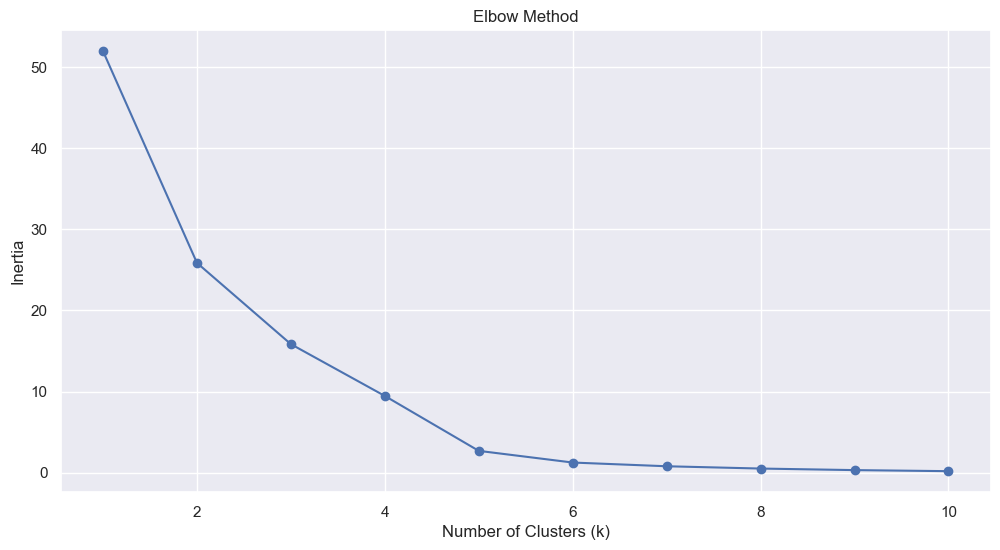

In [11]:
import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")

# Show the Elbow Method

def find_optimal_k_elbow(X,max_k):
  inertias = []
  for k in range (1, max_k + 1):
    kmeans= KMeans(n_clusters=k, random_state= 42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

  # Plotting Elbow Graph
  plt.figure(figsize=(12,6))
  plt.plot(range(1,max_k + 1), inertias, marker = 'o')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.title('Elbow Method' )
  plt.show()

# Finding the optimal k using the Elbow Method
max_k = 10
find_optimal_k_elbow(scaled_features, max_k)

# Show the Silhouette Score Graph

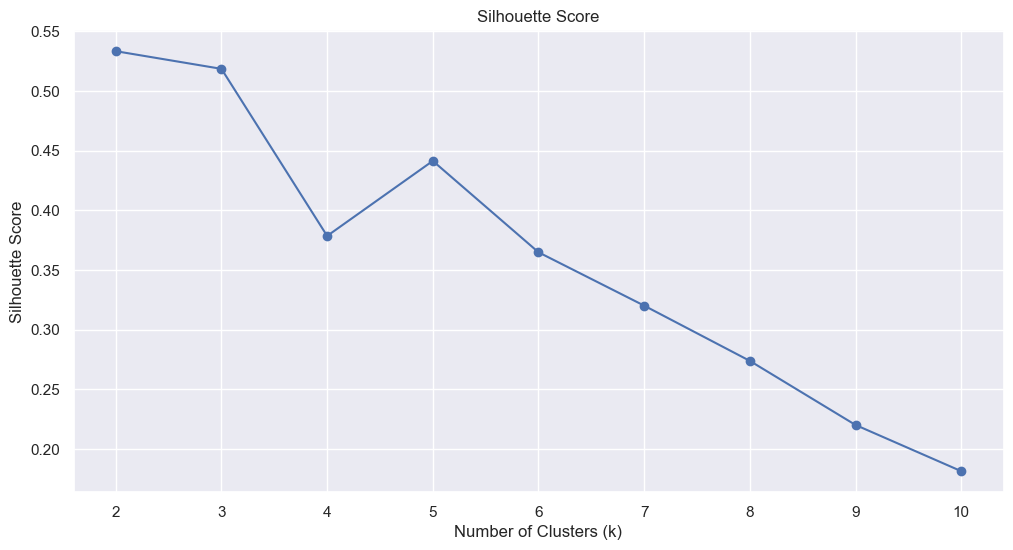

In [12]:
import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import silhouette_score

def find_optimal_k_silhouette(X , max_k):
  silhouette_scores = []
  for k in range(2 , max_k + 1):
    kmeans= KMeans(n_clusters=k, random_state= 42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

  # Plot Silhouette Score Graph
  plt.figure(figsize=(12,6))
  plt.plot(range(2,max_k + 1), silhouette_scores, marker = 'o')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Score' )
  plt.show()

# Finding the optimal k using the Elbow Method
max_k = 10
find_optimal_k_silhouette(scaled_features, max_k)


## Making 5 Clusters

In [13]:
# Total number of clusters
n_clusters = 5

# Performing KMeans Clustering
kmeans = KMeans(n_clusters = n_clusters, random_state=42)
df['label'] = kmeans.fit_predict(scaled_features)

In [17]:
df.head(14)

,Caribbean Countries,Population,Land Size,Crime Rate,GDP,label
0,Antigua & Barbuda,102195,442,64.08,1.857143e+09,0
1,The Bahamas,402200,13939,62.06,1.323165e+10,0
2,Barbados,290000,430,47.13,5.912548e+09,0
3,Cuba,11012000,109884,23.33,1.552865e+10,2
4,Dominica,74656,751,56.25,6.591337e+08,0
5,Dominican Republic,10720000,48223,61.02,1.149952e+11,1
6,Grenada,110000,344,26.70,1.264479e+09,4
7,Haiti,12230000,27065,78.30,1.809889e+10,3
8,Saint Kitts & Nevis,60000,263,20.22,1.039845e+09,4
9,Jamaica,2749000,10991,67.42,1.761502e+10,0


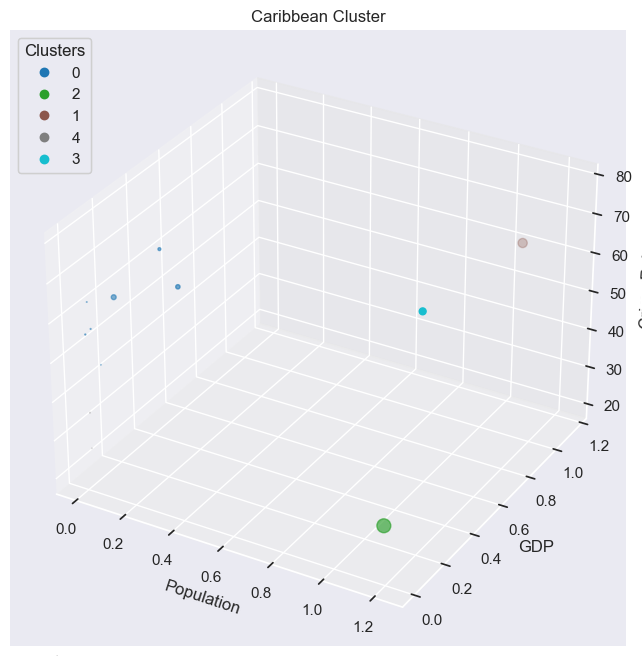

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Creating a colormap for the clusters
labels = df['label'].unique()
colors = plt.cm.get_cmap('tab10', len(labels))  # Use a colormap with enough colors

# Creating a color map that maps each label to a unique color
color_map = {label: colors(i) for i, label in enumerate(labels)}

# Using 'Land Size' values to create sizes for the points
sizes = ((df['Land Size'] - df['Land Size'].min()) / (df['Land Size'].max() - df['Land Size'].min()) * 100)   # Multiply by 30 to scale the size of the data points

# Plotting the data points
scatter = ax.scatter(df['Population'], df['GDP'], df['Crime Rate'], c=df['label'].map(color_map), s=sizes)

# Setting labels for the axes
ax.set_xlabel('Population')
ax.set_ylabel('GDP')
ax.set_zlabel('Crime Rate')

# Setting the Title
ax.set_title('Caribbean Cluster')

# Creating a legend for the clusters
handles = [plt.Line2D([],[],marker="o", ls="", color=color_map[label]) for label in labels]
legend1 = ax.legend(handles, labels, loc="upper left", title="Clusters")
ax.add_artist(legend1)

plt.show()
